In [1]:
import numpy as np

In [4]:
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150.txt')


Length  (6000,)


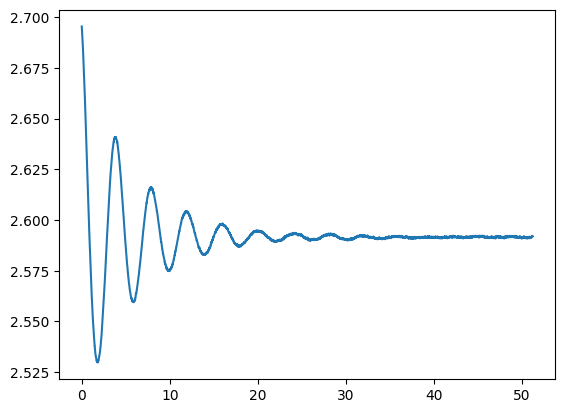

In [6]:
import matplotlib.pyplot as plt

plt.plot(xdata, ydata)
print('Length ', xdata.shape)

In [7]:
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, sin


## example :    omega 1.560126776980724; Gamma   0.167305808977445

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * exp(-b * x) * sin(omega * x + phi) + c

# Load the data from the text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150.txt')

# Initial guess for the fitting parameters
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# Perform the curve fitting
popt, pcov = curve_fit(func, xdata, ydata, p0=initial_guess)

# Extract the fitting parameters
a_fit, b_fit, omega_fit, phi_fit, c_fit = popt

# Print the fitting results
print('Fitted parameters:')
print('a =', a_fit)
print('b =', b_fit)
print('omega =', omega_fit)
print('phi =', phi_fit)
print('c =', c_fit)


Fitted parameters:
a = 0.09315489479813163
b = 0.1753882906695457
omega = 1.563423950577258
phi = 1.76157934427343
c = 2.591901814509789


In [68]:
import numpy as np
from lmfit import Model, fit_report, minimize

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * np.exp(-b * x) * np.sin(omega * x + phi) + c

# Define the residual function
def residual(params, x, y):
    return y - func(x, **params)

# Load data from text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150_6.txt')

# Define the model to be fitted
model = Model(func)

# Set initial parameter values and bounds
params = model.make_params(a=1.0, b=1.0, omega=1.0, phi=1.0, c=1.0)
params['a'].min = 0.0
params['b'].min = 0.0
params['omega'].min = 0.0
params['phi'].min = -np.pi
params['phi'].max = np.pi
params['a'].max = 5.0
params['b'].max = 5.0
params['omega'].max = 5.0
params['c'].min=0.0
params['c'].max=5.0



# Fit the model to the data using different methods
result_least_squares = model.fit(ydata, params, x=xdata, method='leastsq')
result_least_squares_bounds = model.fit(ydata, params, x=xdata, method='least_squares')
result_nelder = minimize(residual, params, args=(xdata, ydata), method='nelder')
result_bfgs = minimize(residual, params, args=(xdata, ydata), method='bfgs')
result_differential_evolution = minimize(residual, params, args=(xdata, ydata), method= 'differential_evolution')

# Print the fit results for each method
print("Results using least squares:")
print(fit_report(result_least_squares))
print("\nResults using least squares with bounds:")
print(fit_report(result_least_squares_bounds))
print("\nResults using Nelder-Mead optimization:")
print(fit_report(result_nelder))
print("\nResults using BFGS optimization:")
print(fit_report(result_bfgs))
print("\nResults using differential_evolution optimization:")
print(fit_report(result_differential_evolution))

Results using least squares:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 101
    # data points      = 6000
    # variables        = 5
    chi-square         = 0.00732161
    reduced chi-square = 1.2213e-06
    Akaike info crit   = -81688.6380
    Bayesian info crit = -81655.1404
    R-squared          = 0.99430520
[[Variables]]
    a:      0.09263010 +/- 1.3195e-04 (0.14%) (init = 1)
    b:      0.18906751 +/- 3.6962e-04 (0.20%) (init = 1)
    omega:  1.75745294 +/- 3.6387e-04 (0.02%) (init = 1)
    phi:    1.82341922 +/- 0.00135037 (0.07%) (init = 1)
    c:      2.59106292 +/- 1.4335e-05 (0.00%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)       = +0.7207
    C(omega, phi) = -0.7098
    C(a, phi)     = +0.2051
    C(b, phi)     = +0.1485
    C(a, omega)   = -0.1470
    C(b, omega)   = -0.1059

Results using least squares with bounds:
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 152


In [27]:
import numpy as np
from lmfit import Model, fit_report

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * np.exp(-b * x) * np.sin(omega * x + phi) + c

# Load data from text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150_6.txt')

# Define the model to be fitted
model = Model(func)

# Set initial parameter values and bounds
params = model.make_params(a=1.0, b=1.0, omega=1.0, phi=1.0, c=1.0)
params['a'].min = 0.0
params['b'].min = 0.0
params['omega'].min = 0.0
params['phi'].min = -np.pi
params['phi'].max = np.pi

# Fit the model to the data
result = model.fit(ydata, params, x=xdata)

# Print the fit results
print(fit_report(result))


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 124
    # data points      = 6000
    # variables        = 5
    chi-square         = 0.00732161
    reduced chi-square = 1.2213e-06
    Akaike info crit   = -81688.6380
    Bayesian info crit = -81655.1404
    R-squared          = 0.99430520
[[Variables]]
    a:      0.09263005 +/- 1.3195e-04 (0.14%) (init = 1)
    b:      0.18906725 +/- 3.6961e-04 (0.20%) (init = 1)
    omega:  1.75745240 +/- 3.6387e-04 (0.02%) (init = 1)
    phi:    1.82342057 +/- 0.00135038 (0.07%) (init = 1)
    c:      2.59106292 +/- 1.4335e-05 (0.00%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)       = +0.7207
    C(omega, phi) = -0.7099
    C(a, phi)     = +0.2051
    C(b, phi)     = +0.1485
    C(a, omega)   = -0.1471
    C(b, omega)   = -0.1060


In [35]:
import numpy as np
from lmfit import Model, fit_report

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * np.exp(-b * x) * np.sin(omega * x + phi) + c

# Define the callback function
def callback(params, iteration, resid, progress):
    progress.append((iteration, params.valuesdict().copy(), np.sum(resid**2)))

# Load data from text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150_6.txt')

# Define the model to be fitted
model = Model(func)

# Set initial parameter values and bounds
params = model.make_params(a=1.0, b=1.0, omega=1.0, phi=1.0, c=1.0)
params['a'].min = 0.0
params['b'].min = 0.0
params['omega'].min = 0.0
params['phi'].min = -np.pi
params['phi'].max = np.pi

# Create a list to store the progress of fitting
progress = []

# Fit the model to the data with callback
result = model.fit(ydata, params, x=xdata, iter_cb=callback, iter_cb_kwargs={'progress': progress})

# Print the fit results
print(fit_report(result))

# Print the progress of fitting
for iteration, params, resid in progress:
    print(f"Iteration {iteration}: Parameters = {params}, Residual = {resid}")


D:\math\anaconda\envs\python\lib\site-packages\lmfit\model.py:1021: UserWarning: The keyword argument iter_cb_kwargs does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +


TypeError: callback() got an unexpected keyword argument 'x'

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, fit_report

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * np.exp(-b * x) * np.sin(omega * x + phi) + c

# Define the callback function
# progress_base = np.array([])
# def per_iteration(pars, iteration, resid, *args, **kws):
#     if iteration % 10 == 0:
#         print(f"ITER {iteration}: {fit_report(pars)}")
#     progress_base = np.concatenate([progress, [p.value for p in pars.values()]])

# Load data from text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150_6.txt')

# Define the model to be fitted
model = Model(func)

# Set initial parameter values and bounds
params = model.make_params(a=0.1, b=0.5, omega=0.1, phi=0.1, c=1.0)
params['a'].min = 0.0
params['a'].max = 1.0
params['b'].min = 0.0
#params['b'].max = 5.0
params['omega'].min = 0.0
params['phi'].min = 0
params['phi'].max = 2*np.pi

# Fit the model to the data with different algorithms and track the progress
methods = ['leastsq', 'least_squares', 'differential_evolution', 'brute', 'basinhopping']
results = {}
for method in methods:
    result = model.fit(ydata, params, x=xdata, method=method)
    results[method] = result
    print(f"FINAL RESULT ({method}): {fit_report(result)}")
    
# Plot the progress of the fit for each parameter
plt.figure()
for i, par in enumerate(params):
    plt.plot(progress_base[i::len(params)], label=par)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.show()


FINAL RESULT (leastsq): [[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 228
    # data points      = 6000
    # variables        = 5
    chi-square         = 0.00732161
    reduced chi-square = 1.2213e-06
    Akaike info crit   = -81688.6380
    Bayesian info crit = -81655.1404
    R-squared          = 0.99430520
[[Variables]]
    a:      0.09263004 +/- 1.3203e-04 (0.14%) (init = 0.1)
    b:      0.18906730 +/- 3.6959e-04 (0.20%) (init = 0.5)
    omega:  1.75745310 +/- 3.6387e-04 (0.02%) (init = 0.1)
    phi:    1.82341875 +/- 0.00135026 (0.07%) (init = 0.1)
    c:      2.59106292 +/- 1.4335e-05 (0.00%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)       = +0.7206
    C(omega, phi) = -0.7098
    C(a, phi)     = +0.2054
    C(b, phi)     = +0.1484
    C(a, omega)   = -0.1473
    C(b, omega)   = -0.1057
FINAL RESULT (least_squares): [[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 129
    # dat

ValueError: differential_evolution requires finite bound for all varying parameters

 ITER  -1 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  0 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  1 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  2 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  3 ['a = 0.10000', 'b = 0.50001', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  4 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00000']
 ITER  5 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10001', 'c = 1.00000']
 ITER  6 ['a = 0.10000', 'b = 0.50000', 'omega = 0.10000', 'phi = 0.10000', 'c = 1.00001']
 ITER  7 ['a = 0.86931', 'b = 12.20508', 'omega = 47.92859', 'phi = 0.14085', 'c = 2.59188']
 ITER  8 ['a = 0.86905', 'b = 12.20508', 'omega = 47.92859', 'phi = 0.14085', 'c = 2.59188']
 ITER  9 ['a = 0.86931', 'b = 12.20495', 'omega = 47.92859', 'phi = 0.14085', 'c = 2.

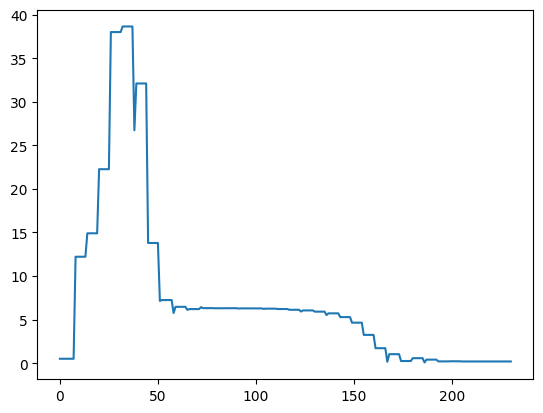

In [59]:
import numpy as np
from lmfit import Model, fit_report

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * np.exp(-b * x) * np.sin(omega * x + phi) + c

# Define the callback function
    
progress_base = np.array([])
def per_iteration(pars, iteration, progress, *args, **kws):
    print(" ITER ", iteration, [f"{p.name} = {p.value:.5f}" for p in pars.values()])    
    #progress.append([p.value for p in pars.values()])
    progress = np.concatenate([progress, [p.value for p in pars.values()]])

# Load data from text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150_6.txt')

# Define the model to be fitted
model = Model(func)

# Set initial parameter values and bounds
params = model.make_params(a=0.1, b=0.5, omega=0.1, phi=0.1, c=1.0)
params['a'].min = 0.0
params['a'].max = 1.0
params['b'].min = 0.0
#params['b'].max = 5.0
params['omega'].min = 0.0
params['phi'].min = 0
params['phi'].max = 2*np.pi

# Fit the model to the data with callback
result = model.fit(ydata, params, x=xdata, iter_cb=per_iteration,iter_cb_kwargs={'progress': progress_base})

# Print the fit results
print(fit_report(result))
progress = np.asarray(progress)
plt.plot(progress[:,1])

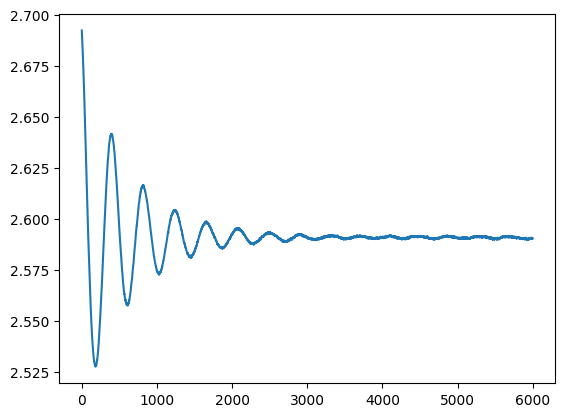

In [50]:
plt.plot(ydata)

In [24]:
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, sin

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * exp(-b * x) * sin(omega * x + phi) + c

# Load the data from the text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150_6.txt')

# Initial guess for the fitting parameters
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# Perform the curve fitting using Levenberg-Marquardt algorithm
popt, pcov = curve_fit(func, xdata, ydata, p0=initial_guess, method='lm')

# Extract the fitting parameters
a_fit, b_fit, omega_fit, phi_fit, c_fit = popt

# Print the fitting results
print('Levenberg-Marquardt Algorithm Fitted parameters:')
print('a =', a_fit)
print('b =', b_fit)
print('omega =', omega_fit)
print('phi =', phi_fit)
print('c =', c_fit)


Levenberg-Marquardt Algorithm Fitted parameters:
a = 0.09262996935349693
b = 0.1890670183866439
omega = 1.7574531088641916
phi = 1.8234186594624437
c = 2.5910629169407455


In [11]:
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, sin

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * exp(-b * x) * sin(omega * x + phi) + c

# Load the data from the text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150.txt')

# Initial guess for the fitting parameters
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# Perform the curve fitting using Powell algorithm
popt, pcov = curve_fit(func, xdata, ydata, p0=initial_guess, method='trf')

# Extract the fitting parameters
a_fit, b_fit, omega_fit, phi_fit, c_fit = popt

# Print the fitting results
print('trf Algorithm Fitted parameters:')
print('a =', a_fit)
print('b =', b_fit)
print('omega =', omega_fit)
print('phi =', phi_fit)
print('c =', c_fit)


trf Algorithm Fitted parameters:
a = 0.0931548812230514
b = 0.1753882637197088
omega = 1.5634241543155132
phi = 1.761578754867822
c = 2.5919018138420786


In [14]:
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, sin

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * exp(-b * x) * sin(omega * x + phi) + c

# Load the data from the text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150.txt')

# Initial guess for the fitting parameters
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# Perform the curve fitting using Differential Evolution algorithm
popt, pcov = curve_fit(func, xdata, ydata, p0=initial_guess, method='dogbox')

# Extract the fitting parameters
a_fit, b_fit, omega_fit, phi_fit, c_fit = popt

# Print the fitting results
print('dogbox Algorithm Fitted parameters')
print('a =', a_fit)
print('b =', b_fit)
print('omega =', omega_fit)
print('phi =', phi_fit)
print('c =', c_fit)

dogbox Algorithm Fitted parameters
a = 0.0931548737069116
b = 0.1753882394273139
omega = 1.563424184793814
phi = 1.7615786619453222
c = 2.591901813746793


In [15]:
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, sin

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * exp(-b * x) * sin(omega * x + phi) + c

# Load the data from the text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150.txt')

# Define the bounds for the fitting parameters
lower_bounds = [0, 0, 0, 0, 0]
upper_bounds = [1, np.inf, np.inf, 4, np.inf]
bounds = (lower_bounds, upper_bounds)

# Initial guess for the fitting parameters
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# Perform the curve fitting using Differential Evolution algorithm with bounds
popt, pcov = curve_fit(func, xdata, ydata, p0=initial_guess, bounds=bounds, method='dogbox')

# Extract the fitting parameters
a_fit, b_fit, omega_fit, phi_fit, c_fit = popt

# Print the fitting results
print('dogbox Algorithm Fitted parameters:')
print('a =', a_fit)
print('b =', b_fit)
print('omega =', omega_fit)
print('phi =', phi_fit)
print('c =', c_fit)


dogbox Algorithm Fitted parameters:
a = 0.09315487272385985
b = 0.17538822413139354
omega = 1.5634240786832516
phi = 1.7615789590104967
c = 2.591901814097705


Iteration: 0
Fitted parameters:
a = 0.09315487272385985
b = 0.17538822413139354
omega = 1.5634240786832516
phi = 1.7615789590104967
c = 2.591901814097705
Iteration: 1
Fitted parameters:
a = 0.09315487735942955
b = 0.17538824193120348
omega = 1.563424085109224
phi = 1.7615789449246204
c = 2.59190181407255
Final fitted parameters:
a = 0.09315487735942955
b = 0.17538824193120348
omega = 1.563424085109224
phi = 1.7615789449246204
c = 2.59190181407255


In [18]:
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, sin

# Define the function to be fitted
def func(x, a, b, omega, phi, c):
    return a * exp(-b * x) * sin(omega * x + phi) + c

# Load the data from the text files
xdata = np.loadtxt('xdata.txt')
ydata = np.loadtxt('data150.txt')

# Define the bounds for the fitting parameters
lower_bounds = [0, 0, 0, 0, 0]
upper_bounds = [1, np.inf, np.inf, 4, np.inf]
bounds = (lower_bounds, upper_bounds)

# Initial guess for the fitting parameters
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# Define the callback function
def callback(params, iteration):
    print(f'Iteration {iteration}:', 'a =', params[0], 'b =', params[1], 'omega =', params[2], 'phi =', params[3], 'c =', params[4])

# Perform the curve fitting using Differential Evolution algorithm with bounds
popt, pcov = curve_fit(func, xdata, ydata, p0=initial_guess, bounds=bounds, method='dogbox', callback=callback)

# Extract the


TypeError: least_squares() got an unexpected keyword argument 'callback'